""

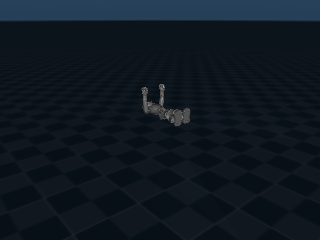

In [56]:
import mujoco
import mediapy as media
import numpy as np
import matplotlib.pyplot as plt 

# Load the scene XML file
model = mujoco.MjModel.from_xml_path("scene.xml")
data = mujoco.MjData(model)

# Make renderer, render and show the pixels
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())

In [57]:
angles = []
joint_names_motion = [
    "HeadYaw", "HeadPitch", "LShoulderPitch", 
    "LShoulderRoll", "LElbowYaw", "LElbowRoll",
    "HipYawPitch", "LHipRoll", "LHipPitch",
    "LKneePitch", "LAnklePitch", "LAnkleRoll", 
    "RHipRoll", "RHipPitch", "RKneePitch",
    "RAnklePitch", "RAnkleRoll", "RShoulderPitch",
    "RShoulderRoll", "RElbowYaw"
]

with open("motions/LeftKneePitchIsolated.mot", "r") as file:
    version = file.readline()
    num_lines = file.readline()
    for _ in range(int(num_lines)):
        line = file.readline()
        values = line.split(",")
        values = [float(value) for value in values]
        angles.append(values)

print(angles)

[[-0.02152, 0.21012, 1.52629, 1.29465, 1.59685, -0.1687, 0.00618, 0.02305, -1.27164, -0.09515, -1.2119, 0.01385, 0.03379, 0.22852, -0.12268, -0.39266, 0.01538, 1.62762, -1.30701, -1.61074, 0.09975], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.09291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.09067, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08843, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08619, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08171, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.07947, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0

Available actuators: ['HeadYaw', 'HeadPitch', 'LHipYawPitch', 'LHipRoll', 'LHipPitch', 'LKneePitch', 'LAnklePitch', 'LAnkleRoll', 'RHipRoll', 'RHipPitch', 'RKneePitch', 'RAnklePitch', 'RAnkleRoll', 'LShoulderPitch', 'LShoulderRoll', 'LElbowYaw', 'LElbowRoll', 'LWristYaw', 'RShoulderPitch', 'RShoulderRoll', 'RElbowYaw', 'RElbowRoll', 'RWristYaw']
[0.11415872 0.09617222 0.21382394]
[0.11415932 0.09617198 0.21382391]
[0.11416031 0.09617173 0.21382381]
[0.11416484 0.0961715  0.21382306]
[0.11417828 0.09617133 0.21382068]
[0.11420487 0.09617117 0.21381585]
[0.11424725 0.09617099 0.21380806]
[0.11430665 0.09617076 0.21379702]
[0.11438315 0.09617045 0.21378265]
[0.11447592 0.09617003 0.21376505]
[0.11458349 0.0961695  0.21374441]
[0.11470395 0.09616886 0.21372103]
[0.11483514 0.09616811 0.21369526]
[0.11497486 0.09616725 0.21366747]
[0.11512094 0.09616631 0.21363805]
[0.1152714  0.09616529 0.21360734]
[0.11542449 0.0961642  0.21357569]
[0.1155787  0.09616306 0.2135434 ]
[0.11573279 0.09616188

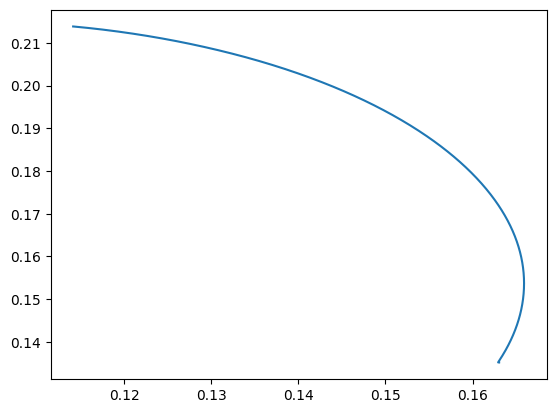

In [58]:
# Get actuator names and their indices
actuator_names = [model.actuator(i).name for i in range(model.nu)]
print("Available actuators:", actuator_names)

# Calculate simulation parameters
frame_time = 0.012  # 12ms per frame
fps = int(1/frame_time)
motion_frames = len(angles)
rest_frames = int(2.0 / frame_time)
total_frames = len(angles) + rest_frames
total_time = total_frames * frame_time

frames = []
tracked_positions_x = []
tracked_positions_y = []

scene_option = mujoco.MjvOption()
camera = mujoco.MjvCamera()

# Configure camera parameters
camera.type = mujoco.mjtCamera.mjCAMERA_FREE
camera.distance = 0.8  
camera.azimuth = 90   
camera.elevation = -10  

# Render the simulation
with mujoco.Renderer(model) as renderer:
    # Apply first frame of angles and wait 2 seconds
    current_angles = angles[0]
    for joint_name, angle in zip(joint_names_motion, current_angles):
        if joint_name in actuator_names and angle != 0:
            data.ctrl[actuator_names.index(joint_name)] = angle
            
    # Simulate and render 2 seconds of rest
    for _ in range(rest_frames):
        mujoco.mj_step(model, data)
        tracked_position = data.site_xpos[model.site("tracking_site").id]
        camera.lookat = tracked_position
        mujoco.mj_forward(model, data)
        
        renderer.update_scene(data, scene_option=scene_option, camera=camera)
        frames.append(renderer.render())

    # Continue with remaining frames
    for frame_idx in range(motion_frames):
        # Apply joint angles from motion file
        current_angles = angles[frame_idx]
        for joint_name, angle in zip(joint_names_motion, current_angles):
            if joint_name in actuator_names and angle != 0:
                data.ctrl[actuator_names.index(joint_name)] = angle

        mujoco.mj_step(model, data)

        tracked_position = data.site_xpos[model.site("tracking_site").id]
        camera.lookat = tracked_position
        mujoco.mj_forward(model, data)

        tracked_positions_x.append(tracked_position[0])
        tracked_positions_y.append(tracked_position[2])

        renderer.update_scene(data, scene_option=scene_option, camera=camera)
        frames.append(renderer.render())

media.show_video(frames, fps=fps)

plt.plot(tracked_positions_x, tracked_positions_y)
plt.show()
